# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on our Boston Housing Data set!

## Objectives
You will be able to:
* Run linear regression on Boston Housing dataset with all the predictors
* Interpret the parameters of the multiple linear regression model

## The Boston Housing Data

We pre-processed the Boston Housing Data again. This time, however, we did things slightly different:
- We dropped "ZN" and "NOX" completely
- We categorized "RAD" in 3 bins and "TAX" in 4 bins
- We used min-max-scaling on "B", "CRIM" and "DIS" (and logtransformed all of them first, except "B")
- We used standardization on "AGE", "INDUS", "LSTAT" and "PTRATIO" (and logtransformed all of them first, except for "AGE") 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_features = boston_features.drop(["NOX","ZN"],axis=1)

# first, create bins for based on the values observed. 3 values will result in 2 bins
bins = [0,6,  24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 4 values will result in 3 bins
bins = [0, 270, 360, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)

In [2]:
age = boston_features["AGE"]
b = boston_features["B"]
logcrim = np.log(boston_features["CRIM"])
logdis = np.log(boston_features["DIS"])
logindus = np.log(boston_features["INDUS"])
loglstat = np.log(boston_features["LSTAT"])
logptratio = np.log(boston_features["PTRATIO"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["CRIM"] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["AGE"] = (age-np.mean(age))/np.sqrt(np.var(age))
boston_features["INDUS"] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))
boston_features["PTRATIO"] = (logptratio-np.mean(logptratio))/(np.sqrt(np.var(logptratio)))

In [3]:
boston_features.head()

,CRIM,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(0, 6]","RAD_(6, 24]","TAX_(0, 270]","TAX_(270, 360]","TAX_(360, 712]"
0,0.000000,-1.704344,0.0,6.575,-0.120013,0.542096,-1.443977,1.000000,-1.275260,1,0,0,1,0
1,0.153211,-0.263239,0.0,6.421,0.367166,0.623954,-0.230278,1.000000,-0.263711,1,0,1,0,0
2,0.153134,-0.263239,0.0,7.185,-0.265812,0.623954,-0.230278,0.989737,-1.627858,1,0,1,0,0
3,0.171005,-1.778965,0.0,6.998,-0.809889,0.707895,0.165279,0.994276,-2.153192,1,0,1,0,0
4,0.250315,-1.778965,0.0,7.147,-0.511180,0.707895,0.165279,1.000000,-1.162114,1,0,1,0,0


## Run an linear model in Statsmodels

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [14]:
boston_features.corr().sort_values('CRIM', axis=1)

,DIS,"RAD_(0, 6]",B,"TAX_(0, 270]","TAX_(270, 360]",RM,CHAS,PTRATIO,LSTAT,AGE,"TAX_(360, 712]","RAD_(6, 24]",INDUS,CRIM
CRIM,-0.743926,-0.713991,-0.478755,-0.406037,-0.362648,-0.306943,0.028496,0.366308,0.591796,0.658284,0.668759,0.713991,0.739553,1.000000
INDUS,-0.730297,-0.415542,-0.331050,-0.409526,-0.335213,-0.431267,0.080728,0.417802,0.617578,0.625381,0.645391,0.415542,1.000000,0.739553
CHAS,-0.087037,-0.016971,0.048788,0.002988,0.015814,0.091251,1.000000,-0.116495,-0.074074,0.086518,-0.017448,0.016971,0.080728,0.028496
RM,0.256584,0.074117,0.128069,0.274491,0.062408,1.000000,0.091251,-0.356109,-0.664528,-0.240265,-0.277940,-0.074117,-0.431267,-0.306943
AGE,-0.778243,-0.339228,-0.273534,-0.247825,-0.327677,-0.240265,0.086518,0.237448,0.606806,1.000000,0.509513,0.339228,0.625381,0.658284
DIS,1.000000,0.391565,0.324841,0.206004,0.521812,0.256584,-0.087037,-0.215174,-0.524343,-0.778243,-0.661235,-0.391565,-0.730297,-0.743926
PTRATIO,-0.215174,-0.416440,-0.167595,-0.256985,-0.087568,-0.356109,-0.116495,1.000000,0.403801,0.237448,0.287984,0.416440,0.417802,0.366308
B,0.324841,0.357539,1.000000,0.187431,0.228624,0.128069,0.048788,-0.167595,-0.341279,-0.273534,-0.367050,-0.357539,-0.331050,-0.478755
LSTAT,-0.524343,-0.313126,-0.341279,-0.329774,-0.210097,-0.664528,-0.074074,0.403801,1.000000,0.606806,0.462684,0.313126,0.617578,0.591796
"RAD_(0, 6]",0.391565,1.000000,0.357539,0.313475,0.197267,0.074117,-0.016971,-0.416440,-0.313126,-0.339228,-0.437485,-1.000000,-0.415542,-0.713991


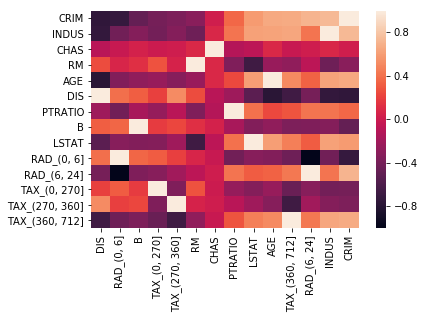

In [13]:
_ = sns.heatmap(boston_features.corr().sort_values('CRIM', axis=1))

In [ ]:
formula = ''

## Run the same model in Scikit-learn

## Remove the necessary variables to make sure the coefficients are the same for Scikit-learn vs Statsmodels

### Statsmodels

### Scikit-learn

## Interpret the coefficients for PTRATIO, PTRATIO, LSTAT

- CRIM: per capita crime rate by town
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- CRIM: 0.15
- INDUS: 6.07
- CHAS: 1        
- RM:  6.1
- AGE: 33.2
- DIS: 7.6
- PTRATIO: 17
- B: 383
- LSTAT: 10.87
- RAD: 8
- TAX: 284

## Summary
Congratulations! You've fitted your first multiple linear regression model on the Boston Housing Data.